# Density based clustering with DB-scan

### Importing libraries

In [1]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn
# Decimal precision value to display in the matrix
np.set_printoptions(precision=5, suppress=True)

# Scipy
import scipy

# Matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# DBscan from sklearn
from sklearn import cluster, datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import time
print 'All libraries loaded.'

All libraries loaded.


### Visualizing the dataset

(900, 3)


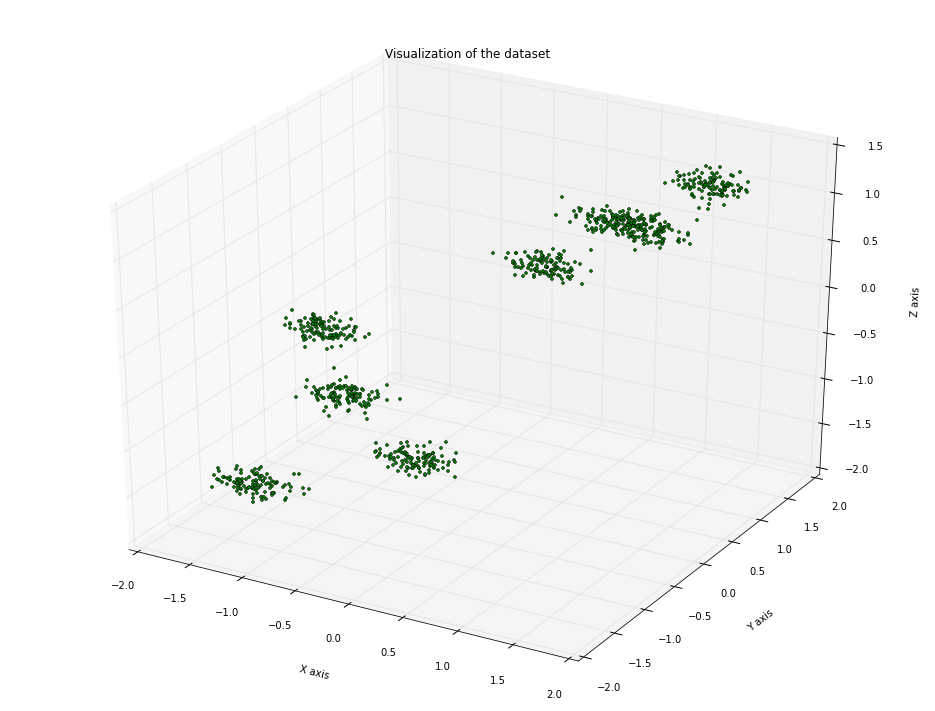

In [2]:
num = 900

centers = [[-2, -8, -6],[0, -4, -6], 
           [-2, -4, 2], [0, -8, 2], 
           [2, 2, 8], [2, -2, 8], 
           [4, 2, 12], [4, -2, 12]
          ]
dataArray, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=0.4, random_state=0)
dataArray = StandardScaler().fit_transform(dataArray)
print dataArray.shape

# Plot the dataset

# figure,axis = pyplot.subplots(1,1)
# axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=5)
# axis.set_title('Visualization of the dataset')
# pyplot.show()

from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
fig.set_size_inches(16.5, 12.5)
axis = fig.add_subplot(111, projection='3d')
axis.set_title('Visualization of the dataset')
axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=3)
axis.set_xlabel('X axis')
axis.set_ylabel('Y axis')
axis.set_zlabel('Z axis')

In [3]:
radius=0.3
min_num_of_samples=50

dbscan_inbuilt = DBSCAN(eps=radius, min_samples=min_num_of_samples, metric='euclidean', algorithm='auto').fit(dataArray)
labels = dbscan_inbuilt.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_inbuilt.core_sample_indices_] = True

print dataArray.shape
unique_labels = set(labels)
print unique_labels

# Number of clusters
numOfClusters = len(set(labels)) - (1 if -1 in labels else 0)
print numOfClusters

# distance metric over feature matrix - Euclidean distance
#distance = EuclideanDistance(train_features, train_features)

(900, 3)
set([0, 1, 2, 3, 4, 5, 6, 7, -1])
8


(900, 3)


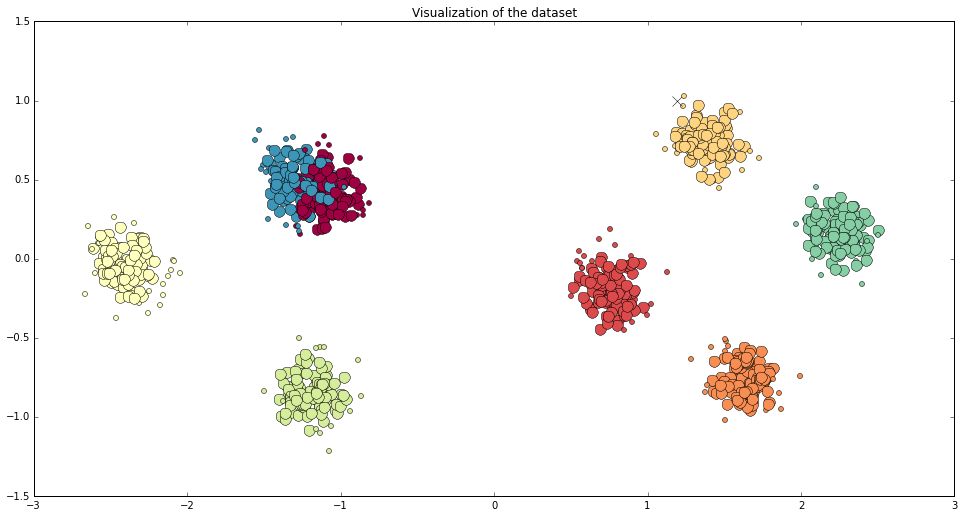

In [4]:
from matplotlib.mlab import PCA
from matplotlib import colors
pca_result = PCA(dataArray)

print pca_result.Y.shape

figure,axis = pyplot.subplots(1,1)
figure.set_size_inches(16.5, 8.5)
clusterColors = pyplot.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for i in range(0, dataArray.shape[0]):
    clusterColor = 'k'
    marker = 'o'
    markerSize = 5
    if labels[i] != -1:
        clusterColor = clusterColors[labels[i]]
    else:
        marker = 'x'
        markerSize = 10
    if core_samples_mask[i]:
        markerSize = 11
    axis.plot(pca_result.Y[i][0], pca_result.Y[i][1], marker, color=clusterColor, markersize=markerSize)
axis.set_title('Visualization of the dataset')
pyplot.show()

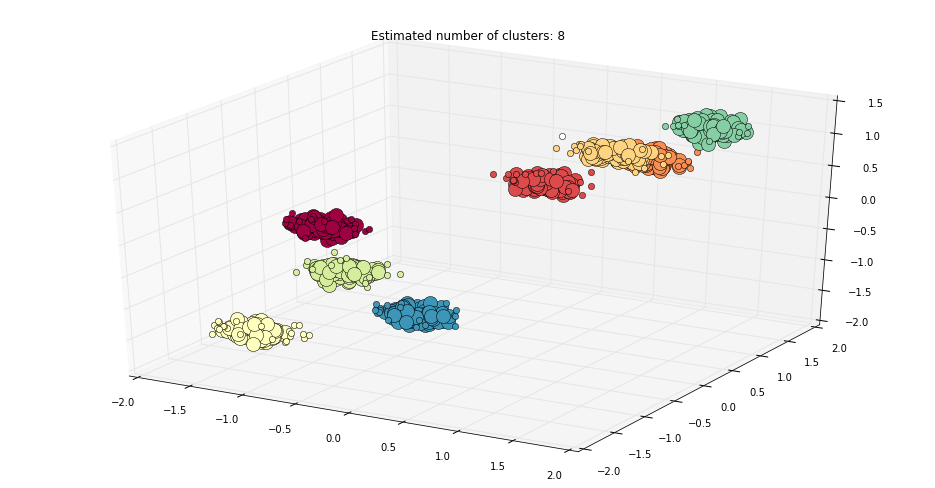

In [5]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
core_samples_mask = np.zeros_like(dbscan_inbuilt.labels_, dtype=bool)
core_samples_mask[dbscan_inbuilt.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

###
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
fig.set_size_inches(16.5, 8.5)
axis = fig.add_subplot(111, projection='3d')
# axis.set_title('Visualization of the dataset')
# axis.plot(dataArray.T[0], dataArray.T[1], dataArray.T[2], 'o', color='g', markersize=3)
####

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'w'

    class_member_mask = (labels == k)

    xy = dataArray[class_member_mask & core_samples_mask]
    axis.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = dataArray[class_member_mask & ~core_samples_mask]
    axis.plot(xy[:, 0], xy[:, 1], xy[:, 2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

axis.set_title('Estimated number of clusters: %d' % numOfClusters)
plt.show()

## Functions for plotting

In [6]:
# Generate points of data for this demo
num_of_points = 10
centers = [[4,4],[8,8]]
dataArray, labels_true = make_blobs(n_samples=num_of_points, n_features=2, centers=centers, cluster_std=0.6, random_state=0)

def plotPointsAndCircles(dataPoints, circleCentres, neighborhood=[], radius=0.7, markersize=8):
    # Plot the dataset
    figure,axis = pyplot.subplots(1,1)
    figure.set_size_inches(26.5, 8.5)
    
    # Plot ALL the points first
    axis.plot(dataPoints.T[0], dataPoints.T[1], 'o', color='k', markersize=markersize, alpha=0.65)
    # Plot neighborhood points
    if len(neighborhood) > 0:
        axis.plot(neighborhood.T[0], neighborhood.T[1], 'o', color='lawngreen', markersize=markersize)
    # Plot circle centres
    axis.plot(circleCentres.T[0], circleCentres.T[1], 'o', color='g', markersize=markersize+2)    
    
    axis.set_title('Visualization of the dataset')

    for x in circleCentres:
        circle = plt.Circle(x, radius=radius, color='gray', fill=False)
        plt.gca().add_patch(circle)
    plt.axis('scaled')

    # Define size of the plotted figure
    plt.figure(num=None, figsize=(18.0, 14.0), dpi=580, facecolor='w', edgecolor='k')
    pyplot.show()

## My DB scan implementation functions

In [7]:
# # Returns all points within P's eps-neighborhood (including P)
# def regionQuery(P, eps, D):
#     neighborhood = []
#     lastColumnIndex = P.shape[0]-2
#     for Q in D:
#         # Ignore first 2 columns, and last 2 columns
#         distance = scipy.spatial.distance.euclidean(Q[2:lastColumnIndex], P[2:lastColumnIndex])
#         if distance <= eps:
#             neighborhood.append(Q)
#     return np.array(neighborhood)

In [8]:

eps = 1.2
current_point = dataArray[0]
neighborhood = regionQuery(P=current_point, eps=eps, D=dataArray)
print neighborhood.shape[0], 'neighbours found.'

circleCentres = []
circleCentres.append(current_point)
circleCentres = np.array(circleCentres)
plotPointsAndCircles(dataArray, circleCentres, neighborhood=neighborhood, radius=eps)

NameError: name 'regionQuery' is not defined

## Load datasets

In [9]:
# Load data from the given file into a numpy array
def getDataSetFromFile(filePath, delimiter='\t', datatype=float):
    data_set = np.loadtxt(filePath, delimiter=delimiter, dtype=datatype)

    # Remove the first 2 columns
    # data_set = np.delete(data_set, (0,1), 1)
    
    # Add 2 columns at the end to keep track of visited points, and for labels
    zero_column = np.zeros((data_set.shape[0],1))
    data_set = np.concatenate((data_set, zero_column), axis=1)
    data_set = np.concatenate((data_set, zero_column), axis=1)
    
    # Shuffle the rows up
    np.random.shuffle(data_set)
    
    return data_set


# Get the datasets
def loadDatasets():
    cho_dataset = getDataSetFromFile('dataset/cho.txt')
    iyer_dataset = getDataSetFromFile('dataset/iyer.txt')
    print 'Datasets loaded.'
    print 'The cho dataset contains', cho_dataset.shape[0], 'record, with', cho_dataset.shape[1]-1, 'features'
    print 'The iyer dataset contains', iyer_dataset.shape[0], 'record, with', iyer_dataset.shape[1]-1, 'features'
    print '2 columns have been added at the end to keep track of visited points, and labels.'
    return cho_dataset, iyer_dataset


# Load datasets
print 'Loading datasets...'
cho_dataset, iyer_dataset = loadDatasets()

Loading datasets...
Datasets loaded.
The cho dataset contains 386 record, with 19 features
The iyer dataset contains 517 record, with 15 features
2 columns have been added at the end to keep track of visited points, and labels.


## Density reachable points

#### This is a demo of density reachability. Given a point P, we have found all neighbors of P <br>that lie within an eps radius of it - also known as density reachable points of P.

In [10]:
eps = 0.3
cho_dataset_subset = cho_dataset[:, 0:6]

current_point = cho_dataset_subset[27]
neighborhood = regionQuery(P=current_point, eps=eps, D=cho_dataset_subset)
circleCentres = []
circleCentres.append(current_point[2:4])
circleCentres = np.array(circleCentres)

plotPointsAndCircles(cho_dataset_subset[:, 2:4], circleCentres, neighborhood=neighborhood[:,2:4], radius=eps)

NameError: name 'regionQuery' is not defined

In [11]:
def isVisited(P):
    return (P[P.shape[0]-2])>0

def assignLabel(P, D, label):
    D[int(P[0])-1][D.shape[1]-1] = label


# Returns all points within P's eps-neighborhood (including P)
def regionQuery(P, eps, D):
    neighborhood = []
    lastColumnIndex = P.shape[0]-2
    
    for Q in D:
        # Ignore first 2 columns, and last 2 columns
        distance = scipy.spatial.distance.euclidean(Q[2:Q.shape[0]-2], P[2:P.shape[0]-2])
        if distance <= eps:
            neighborhood.append(Q)
    return np.array(neighborhood)


def markAsVisited(P, D):
    D[int(P[0])-1][D.shape[1]-2] = 1

# Expand cluster
def expandCluster(P, neighbor_pts, eps, min_pts, D):
    # Initialize the cluster C with P
    C = np.empty((0, P.shape[0]))

    for Q in neighbor_pts:
        if not isVisited(Q):
            markAsVisited(Q, D)
            Q_neighbor_pts = regionQuery(Q, eps, D)
            
            if Q_neighbor_pts.shape[0] >= min_pts:
                # Add Q's neighbor points into P's
                neighbor_pts = np.concatenate((neighbor_pts, Q_neighbor_pts), axis=0)
                
        # if Q is not yet member of any cluster
        if D[int(Q[0])-1][D.shape[1]-1] == 0:
            # add Q to cluster C
            Q = np.array([Q])
            C = np.append(C, Q, axis=0)

    return C


# The DB scan function
def dbscan(D, eps, min_pts):
    cluster_list = []
    noise_pts = []

    for P in D:
        # Considering point P now
        # print 'Considering P =', int(P[0]), ', isVisited =', int(P[P.shape[0]-2]), ', label =', int(P[P.shape[0]-1])
        if isVisited(P):
            continue
        markAsVisited(P, D)
        
        # Get neighbors of P
        neighbor_pts = regionQuery(P, eps, D)
        # for neighbor in neighbor_pts:
        #    print '\tNeighbor', neighbor[0]
        
        if neighbor_pts.shape[0] < min_pts:
            # Mark P as noise
            # print int(P[0]),'is noise.'
            assignLabel(P, D, -1)
            noise_pts.append(P[0])
        else:
            # print int(P[0]),'is a core point.'
            # P is a core point.
            # Expand it into a new cluster C
            C = expandCluster(P, neighbor_pts, eps, min_pts, D)
            # print '\nNew cluster =>' , C
            cluster_list.append([C])


        #break #-----remove this later

    return cluster_list, noise_pts

def print_clustering_results(cluster_list, noise_pts):
    print '# of clusters =>', len(cluster_list), '\tnoise points =>', len(noise_pts)
#     clusts = ""
#     for cluster in cluster_list:
#         clust = ""
#         for element in cluster:
#             for index in element:
#                 clust = clust + str(index[0]) + "  "
#         clusts = clusts + "\n[" + clust + "]"
#     print 'Clusters: ' + clusts



def construct_matrix(cluster_map, matrix_size):
    M = np.zeros((matrix_size+1, matrix_size+1))
    for cluster_id, point_list in cluster_map.iteritems():
        for P1 in point_list:
            for P2 in point_list:
                M[P1][P2] = 1

    M = np.delete(M, 0, 0)
    M = np.delete(M, 0, 1)
    return M

def make_ground_truth_map(D):
    clusterToNodeMap = {}
    for P in D:
        point_id = P[0]
        cluster_id = P[1]
        if cluster_id in clusterToNodeMap:
            existingList = clusterToNodeMap.get(cluster_id)
            existingList.append(int(point_id))
            clusterToNodeMap[cluster_id] = existingList
        else:
            clusterToNodeMap[cluster_id] = [int(point_id)]
    return clusterToNodeMap


def make_cluster_result_map(D):
    clusterToNodeMap = {}
    clus_count = 0
    for cluster in D:
        cluster_id = clus_count
        clus_count += 1
        
        for point_list in cluster:
            for P in point_list:
                point_id = P[0]
                if cluster_id in clusterToNodeMap:
                    existingList = clusterToNodeMap.get(cluster_id)
                    existingList.append(int(point_id))
                    clusterToNodeMap[clus_count] = existingList
                else:
                    clusterToNodeMap[clus_count] = [int(point_id)]
    return clusterToNodeMap

def compare_matrices(M1, M2):
    ss = 0
    sd = 0
    ds = 0
    dd = 0
    for index in np.ndindex(M1.shape):
        a = M1[index]
        b = M2[index]
        if a == 0 and b == 0:
            dd += 1
        elif a == 1 and b == 1:
            ss += 1
        elif a == 1 and b == 0:
            sd += 1
        elif a == 0 and b == 1:
            ds += 1
    jaccard = ss / (ss + sd + ds)
    rand = (ss + dd) / (ss + sd + ds + dd)
    return jaccard, rand


In [14]:
# Run DB scan
print "\nStarting DB scan\n----------------"
start_time = time.time()
clustering_results, noise_pts = dbscan(cho_dataset, eps=2.5, min_pts=20)
print "DB scan completed in", (time.time() - start_time), "seconds."
start_time = time.time()

print_clustering_results(clustering_results, noise_pts)
print '\n', clustering_results


Starting DB scan
----------------
DB scan completed in 26.4188559055 seconds.
# of clusters => 115 	noise points => 6
Map constructed in 0.0152938365936 seconds.
result_map {1: [340, 146, 79, 62, 173, 162, 44, 149, 95, 241, 68, 194, 223, 81, 25, 143, 158, 252, 64, 224, 98, 156, 225, 168, 235, 177, 271, 117, 152, 273, 157, 128, 254, 154, 133, 230, 136, 172, 187, 116, 118, 94, 231, 89, 88, 277, 150, 3, 267, 75, 171, 131, 175, 290, 159, 213, 32, 74, 93, 37, 148, 141, 120, 328, 48, 111, 132, 92, 137, 281, 167, 85, 193, 119, 147, 113, 41, 237, 2, 104, 200, 70, 259, 170, 160, 221, 182, 124, 101, 180, 289, 155, 208, 87, 265, 196, 29, 80, 227, 234, 109, 110, 201, 112, 115, 121, 144, 145, 264, 202, 163, 178, 83, 184, 103, 142, 192, 183, 185, 153, 266, 226, 174, 5, 63, 186, 140, 164, 100, 97, 114, 232, 205, 244, 86, 197, 8, 84, 102, 176, 139, 242, 96, 198, 161, 65, 82, 233, 138, 299, 78, 9, 71, 206, 274, 46, 105, 77, 76, 106, 240, 79, 173, 247, 162, 149, 95, 68, 194, 223, 81, 143, 158, 252, 64,

NameError: name 'cluster_result_matrix' is not defined

In [ ]:
result_map = make_cluster_result_map(clustering_results)
print "Map constructed in", (time.time() - start_time), "seconds."
print 'result_map', result_map
start_time = time.time()

cluster_result_matrix = construct_matrix(result_map, cho_dataset.shape[0])
print "Results matrix constructed in", (time.time() - start_time), "seconds."
start_time = time.time()

ground_truth_matrix = construct_matrix(make_ground_truth_map(cho_dataset), cho_dataset.shape[0])
print "Ground-truth matrix constructed in", (time.time() - start_time), "seconds."
start_time = time.time()
jaccard, rand = compare_matrices(cluster_result_matrix, ground_truth_matrix)
print "Jaccard coeff calculated in", (time.time() - start_time), "seconds."
print '\nJaccard = ', jaccard